# Mean-Shift Clustering

In [1]:
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler 
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Open Dataframes from File

In [2]:
# load resource_priority_df from a file
with open('pickles/resource_priority_df.pickle', 'rb') as f:
    resource_priority_df = pickle.load(f)
    
# load ability_priority_df from a file
with open('pickles/ability_priority_df.pickle', 'rb') as f:
    ability_priority_df = pickle.load(f)
    
# load map_movement_df from a file 
with open('pickles/lane_info_df.pickle', 'rb') as f:
    map_movement_df = pickle.load(f)
    

In [14]:
print(len(resource_priority_df))
X_rp = resource_priority_df[resource_priority_df['hero_id'] == hero_id]
print((X_rp))
print((ability_priority_df))
print((map_movement_df))

389
         match_id  team  hero_id  player_slot  xpm_priority  gold_priority
291    7083305097     1        7            1      0.148715       0.129923
528    7082722396     0        7          131      0.216134       0.153690
910    7082204525     1        7            0      0.197775       0.160792
1230   7081372567     1        7            0      0.225693       0.214029
1260   7081318183     1        7            0      0.180175       0.133621
1680   7080700633     1        7            0      0.161632       0.124876
1712   7080674955     1        7            2      0.139628       0.132673
1894   7080323641     1        7            4      0.173804       0.132628
1961   7080055687     1        7            1      0.170518       0.147240
2154   7079723265     1        7            4      0.201607       0.185646
2220   7079651268     1        7            0      0.129612       0.132335
2248   7079633624     0        7          131      0.143247       0.110457
2291   7079594677    

In [3]:
hero_id = 7 #earthshaker
resource_priority_df = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

## Function for visualizing counts

In [4]:
def show_cluster_graph(scaled_df, clustered_data, title, hero_id):
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=clustered_data)
    plt.title(title + str(hero_id))
    plt.show()

def show_cluster_counts(dataframe, graph_name):
    role_counts = np.bincount(dataframe)

    plt.bar(range(len(role_counts)), role_counts)

    plt.xlabel('Role')
    plt.ylabel('Count')
    plt.title(graph_name)

    plt.show()
    
def show_vertical_bar_graph(clustered_data, title, x_label, y_label, features_label):
    position_assignments = [features_label[label] for label in clustered_data]
    position_counts = {label: position_assignments.count(label) for label in features_label.values()}
    plt.bar(position_counts.keys(), position_counts.values())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

## Mean Shift -- Resource Prioritization

In [5]:
hero_id = 7 #earthshaker
X_rp = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

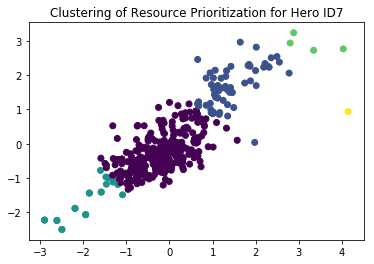

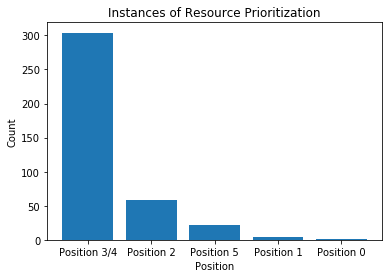

In [6]:
scale = StandardScaler()
scaled_df_rp = scale.fit_transform(X_rp[['xpm_priority', 'gold_priority']])

meanshift_rp = MeanShift(bandwidth=0.75)

meanshift_rp.fit(scaled_df_rp)

target_hero_roles_rp = meanshift_rp.predict(scaled_df_rp)

show_cluster_graph(scaled_df_rp, target_hero_roles_rp, "Clustering of Resource Prioritization for Hero ID", hero_id)

position_labels = {0:"Position 3/4", 1:"Position 2", 2:"Position 5", 3:"Position 1", 4: "Position 0"}
show_vertical_bar_graph(target_hero_roles_rp, 'Instances of Resource Prioritization', 'Position', 'Count', position_labels)

## Mean Shift -- Ability Prioritization

In [7]:
ability_priority_df.dropna(inplace=True)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 2 2 1 2 2 3 5 3 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


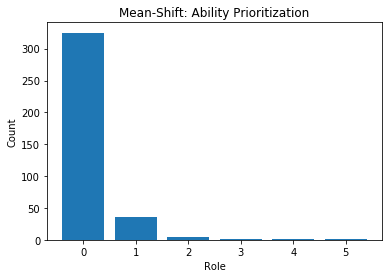

In [8]:
scale = StandardScaler()
scaled_df_ap = scale.fit_transform(ability_priority_df[['A1', 'A2', 'A3', 'A4']])

meanshift_ap = MeanShift(bandwidth=1.5)

meanshift_ap.fit(scaled_df_ap)

target_hero_roles_ap = meanshift_ap.predict(scaled_df_ap)

print(target_hero_roles_ap) 

show_cluster_counts(target_hero_roles_ap, "Mean-Shift: Ability Prioritization")

## Mean Shift -- Lane Info


[0 0 1 1 0 0 1 0 0 1 0 0 2 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 2 2 0 2 0 0 0 0 0 0 0 0 1 0 0 0 1 2 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 1 1 4 0 0 0 2 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 1 0 2 0 1 4
 0 1 0 2 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 3 1 1 1 1 0 0
 0 0 2 1 0 1 3 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 3 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 2 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 2 0 0
 0 0 0 2 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 1 1 0 0 0 0 0 0 2 1 0
 1 1 0 0 1 0 0 0 1 0 1 0 0]


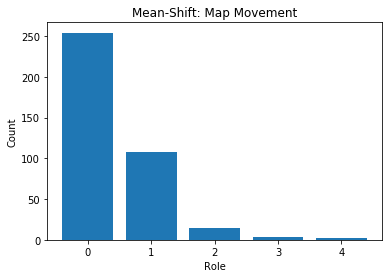

In [9]:
scale = StandardScaler()
scaled_df_lane = scale.fit_transform(map_movement_df[['off', 'mid', 'safe', 'roaming']])

meanshift_lane = MeanShift(bandwidth=1)

meanshift_lane.fit(scaled_df_lane)

target_hero_roles_mm = meanshift_lane.predict(scaled_df_lane)

print(target_hero_roles_mm) 

show_cluster_counts(target_hero_roles_mm, "Mean-Shift: Map Movement")

## Save Results to File

In [10]:
# add match_ids to labels
resource_priority_meanshift = pd.DataFrame({'match_id': X_rp['match_id'], 'labels': target_hero_roles_rp})
ability_priority_meanshift = pd.DataFrame({'match_id': ability_priority_df['match_id'], 'labels': target_hero_roles_ap})
map_movement_meanshift = pd.DataFrame({'match_id': map_movement_df['match_id'], 'labels': target_hero_roles_mm})

# save resource_priority_meanshift to a file
with open('pickles/results_RP_meanshift.pickle', 'wb') as f:
    pickle.dump(resource_priority_meanshift, f)

# save ability_priority_meanshift to a file
with open('pickles/results_AP_meanshift.pickle', 'wb') as f:
    pickle.dump(ability_priority_meanshift, f)  
    
# save map_movement_meanshift to a file
with open('pickles/results_MM_meanshift.pickle', 'wb') as f:
    pickle.dump(map_movement_meanshift, f)  